# **K-means Clustering**

* K-mean clustering is a type of unsupervised learning algorithm.
* It works on unlabeled data. 
* It make clusters from unlabeled data.

### Example:


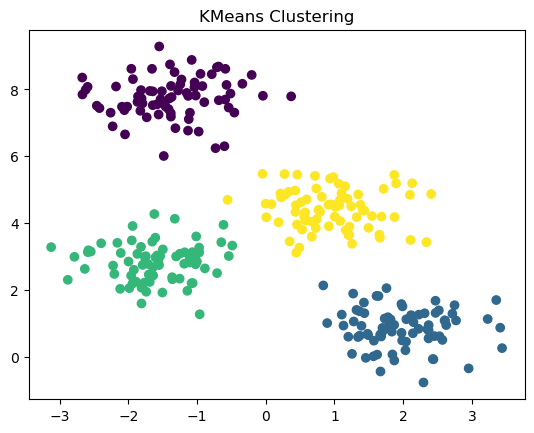

In [26]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings

warnings.filterwarnings('ignore')

# Generate Sample data 

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#Initialize KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)

#fir the model to the data
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels= kmeans.labels_

#plot the data points with different colors for each cluster
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()

# Let's practice on diamond dataset

In [27]:
# Load the data
df = sns.load_dataset('diamonds')
df.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

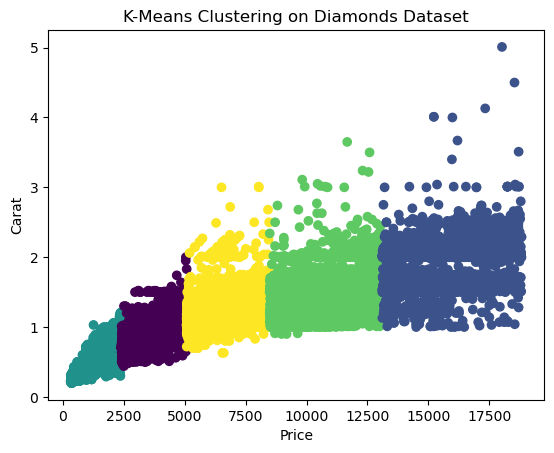

In [28]:
# We are going to use the carat and price columns for clustering


X = df[['price', 'carat']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
df['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

<Axes: xlabel='labels', ylabel='price'>

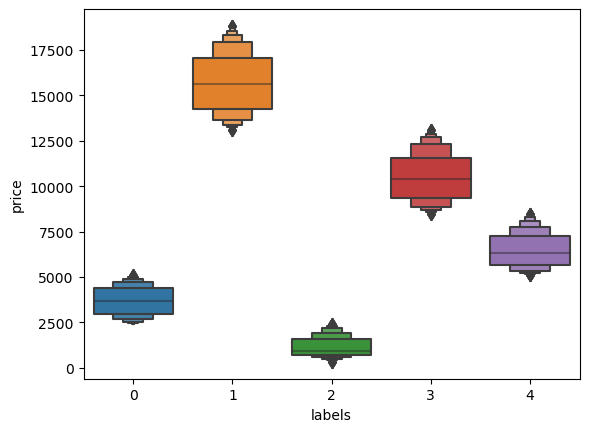

In [29]:
#plot the boxplot for each cluster
sns.boxenplot(x='labels', y='price', data=df)

In [30]:
df.head(3)

carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       2
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       2
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       2

In [31]:
df.labels.unique()

array([2, 0, 4, 3, 1])

# lets change the number of clusters

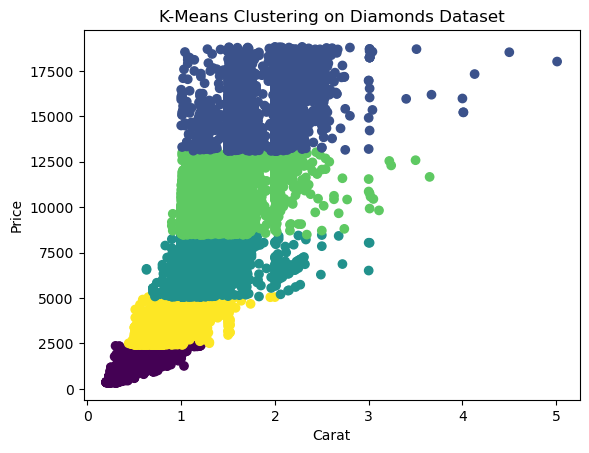

In [32]:
diamonds = sns.load_dataset('diamonds')
# Select relevant columns
X = diamonds[["carat", "price", "cut", "color", "clarity"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

## Which kind of input variables can we take in k means clustering?

* K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

 * The input variables (features) used in k-means clustering should be numerical and continuous. K-means is a distance-based algorithm, and it calculates the distance between data points based on the features. Therefore, it is important to scale the features before applying k-means clustering.

## Adding cluster labels to the data for further EDA work

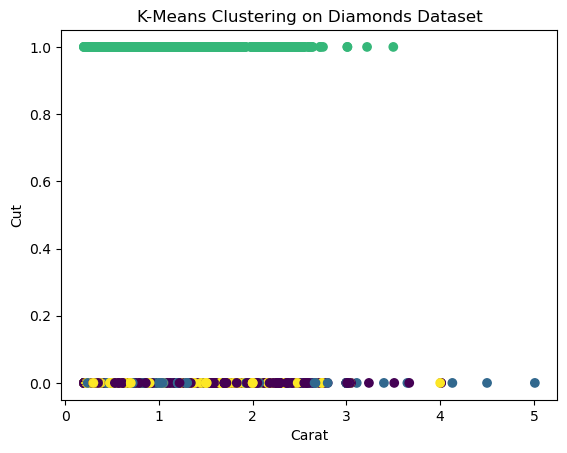

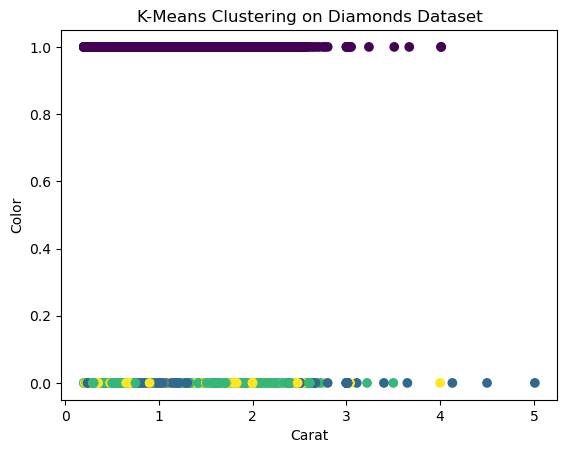

In [38]:
# Select relevant columns
X = diamonds[["carat", "cut", "color"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel("Carat")
plt.ylabel("Cut")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel("Carat")
plt.ylabel("Color")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

In [39]:
# Select relevant columns
X = diamonds[["carat", "price"]]

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.predict(X)

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Display the first few rows of the dataset with the new column added
print(diamonds.head())

#display the unique values of a label
print("These are the unique values of labels: ", sorted(diamonds.labels.unique()))

   carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       1
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       1
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       1
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       1
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       1
These are the unique values of labels:  [0, 1, 2, 3, 4]


### Make a parallel coordinate plot to compare the clusters using plotly

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(diamonds, color="labels")
fig.show() 

# **Model Evaluation** 
### 1. **Elbow Method**

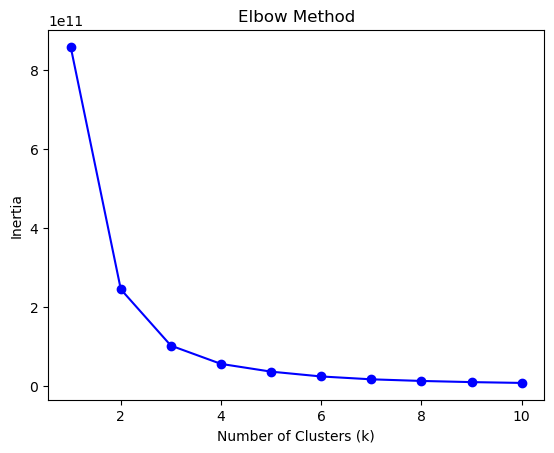

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

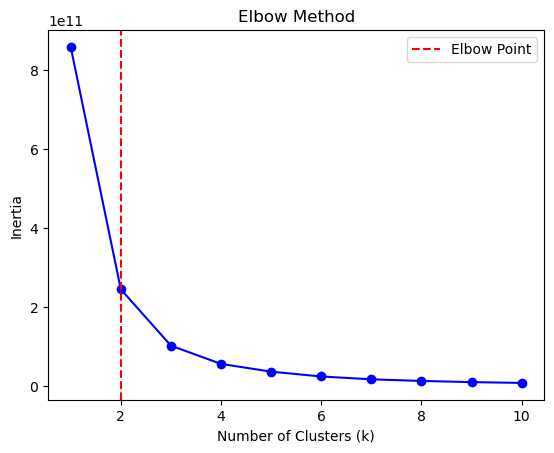

The best number of clusters based on the Elbow Method is: 2


In [45]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)


### 2. **Silouette Method**

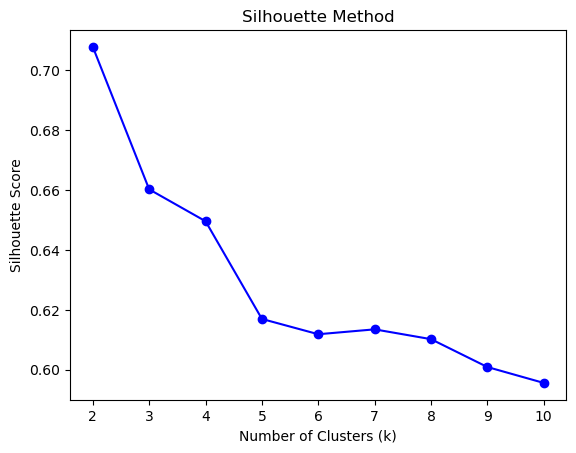

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Other evaluation methdos

1. **Calinski-Harabasz**
1. **Davies-Bouldin**
2. **Silhouette**
3. **Gap statistic**
4. Bayesian information criterion (BIC)

Many other can be seen from this [blog](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad)


# **K-means++**

The main difference between K-means and K-means++ lies in the initialization of cluster centroids. The standard K-means algorithm initializes centroids randomly, while K-means++ improves this initialization by selecting centroids in a more strategic and probabilistic manner. Here are the key distinctions:

**Centroid Initialization:**

* K-means: In the original K-means algorithm, centroids are initialized randomly from the available data points.
* K-means++: The K-means++ algorithm initializes the first centroid randomly, but subsequent centroids are chosen based on the distances to previously selected centroids. Data points farther away from existing centroids have a higher probability of being chosen.

**Impact on Clustering Results:**

* K-means: The random initialization in K-means can lead to different clusterings each time the algorithm is run. It is more sensitive to the initial placement of centroids, and there is a higher chance of converging to suboptimal solutions.
* K-means++: By strategically initializing centroids, K-means++ mitigates the sensitivity to initialization. It encourages a more spread-out initialization, which typically leads to better cluster formation and more reliable results. K-means++ tends to produce more stable and consistent clusters across different runs.

**Convergence and Efficiency:**

* K-means: The random initialization in K-means may require more iterations to converge, as the initial centroids might be far from their optimal positions. It can result in slower convergence and higher computational costs.
* K-means++: The improved initialization in K-means++ often leads to faster convergence since the initial centroids are better positioned. It reduces the number of iterations required to achieve convergence and can improve the algorithm's efficiency.
* Overall, K-means++ is a modification of the standard K-means algorithm that provides a more effective and robust initialization scheme. By selecting initial centroids strategically, it enhances the quality of the clustering results and reduces sensitivity to the initial random initialization. K-means++ is widely used in practice as it improves the performance and stability of the K-means clustering algorithm.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering with K-means++
k = 3  # Number of clusters
kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_pp.fit(X)

# Perform standard K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df['cluster_pp'] = kmeans_pp.labels_
df['cluster'] = kmeans.labels_

df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   cluster_pp  cluster  
0           0        0  
1           0        0  
2           0        0  
3           0        0  
4           0        0

In [48]:
df.cluster.value_counts()

cluster
0    33005
2    15304
1     5631
Name: count, dtype: int64

In [49]:
df.cluster_pp.value_counts()

cluster_pp
0    33005
2    15304
1     5631
Name: count, dtype: int64

In [53]:
# let's use plotly and make plots

import plotly.express as px
fig = px.scatter(df, x='carat', y='price', color='cluster_pp')
fig.show()

In [51]:
# make a 3d plot in plotly
fig = px.scatter_3d(df, x='carat', y='depth', z='price', color='cluster_pp')
fig.show()